# Aula 5 - Uma nova visualização e os stop words

Aqui está um resumo de todos métodos utilizados nas aulas para primeiros tratamentos e análises.

In [ ]:
!wget "https://storage.googleapis.com/kaggle-data-sets/51413%2F95829%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1590879438&Signature=YUEjBj62xQy7gc9Vu%2Fo8%2FAeVbknjEbJxU3ByApy9kc5ldHdnxafRPlZIYIAF9DvTCO5YyPfLFxpXhUqtpyjOyOPxTqmtHeKG4%2FK2ECGPbhJeVMxleJjtUuc3aUCEcOYkMCnMEuUG1G%2Bq0sMRrUp%2Bfkdk98OqHJt9dmQKtI1Yi96PB99IAoAgPFC4c2pXTbWwxkKD%2FEc0UWt22qwp0ngG8oSW%2Bmy49WPxzeGJyi6nkMaobdw%2FLKZs3UGX0M1kQ0W1%2B2fSCqcoooe8IH667rhPkZUhe6%2BPoBnYFAXx2zn79CknVJWuWV7GmbaJGw%2FlpysgXnk8nENB6JI%2Fm6vltk%2BQwQ%3D%3D"
!mv '51413%2F95829%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1590879438&Signature=YUEjBj62xQy7gc9Vu%2Fo8%2FAeVbknjEbJxU3ByApy9kc5ldHdnxafRPlZIYIAF9DvTCO5YyPfLFxpXhUqtpyjOyOPxTqmtHeKG4%' imdb-resenhas-pt-br.zip
!unzip imdb-resenhas-pt-br.zip

import pandas as pd
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk import tokenize
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
resenha = pd.read_csv('imdb-reviews-pt-br.csv')

In [ ]:
class NPL:

    #Função para iniciar a classe
    def __init__(self, data):
        self.data = data

    #Função para remover as stopwords das frases e criar uma nova coluna com as frases reprocessadas
    def rmv_stopwords(self, column):
        token_espaco = tokenize.WhitespaceTokenizer()
        palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

        frase_processada = list()

        for op in self.data[column]:
            nova_frase = list()
            palavras_texto = token_espaco.tokenize(op)
            for palavra in palavras_texto:
                if palavra not in palavras_irrelevantes:
                    nova_frase.append(palavra)
            
            frase_processada.append(' '.join(nova_frase))

        self.data['frase_processada'] = frase_processada
        print("StopWords removidos.")

    #Treina modelo para classificar se as frases são pos ou neg
    def classifier_text(self, column_text, column_cassifier):

        vetorizar = CountVectorizer(lowercase=False, max_features=50)
        bag_of_words = vetorizar.fit_transform(self.data[column_text])

        x = bag_of_words
        y = self.data[column_cassifier]

        x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=42)

        regressao_log = LogisticRegression(solver='lbfgs')
        regressao_log.fit(x_treino, y_treino)
        acuracia = regressao_log.score(x_teste, y_teste)
        print(acuracia)

    #Rederiza plotagem da imagem de nuvem de palavras
    def img_nuvem_palavra(self, column_text, pos_ou_neg, col_pos_ou_neg):
        q = f"{col_pos_ou_neg} == '{pos_ou_neg}'"

        self.data.query(q)
        todas_palavras = ' '.join([word for word in self.data[column_text]])
        nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
        plt.figure(figsize=(10,7))
        plt.imshow(nuvem_palavras, interpolation='bilinear')
        plt.axis('off')
        plt.show()

    #Faz a plotagem de um gráfico de barra mostrando as palavras mais frequentes
    def f_pareto(self, column_text, quant):

        token_espaco = tokenize.WhitespaceTokenizer()
        todas_palavras = ' '.join([word for word in self.data[column_text]])

        token_frase = token_espaco.tokenize(todas_palavras)
        frequencia = nltk.FreqDist(token_frase)
        df_palavras = pd.DataFrame({"palavras" : list(frequencia.keys()), "frequencia" : list(frequencia.values())})

        dados = df_palavras.nlargest(columns='frequencia', n = quant)
        plt.figure(figsize=(12,8))
        ax = sns.barplot(data = dados, x = 'palavras', y = 'frequencia', palette="Blues_d")
        ax.set(ylabel='contagem')
        plt.show()

    #Exibi o DataFrame
    def show_df(self):
        return self.data

In [ ]:
pross_ling = NPL(resenha)
pross_ling.rmv_stopwords("text_pt")

StopWords removidos.


In [ ]:
pross_ling.classifier_text('frase_processada', 'sentiment')

0.6607359482410028


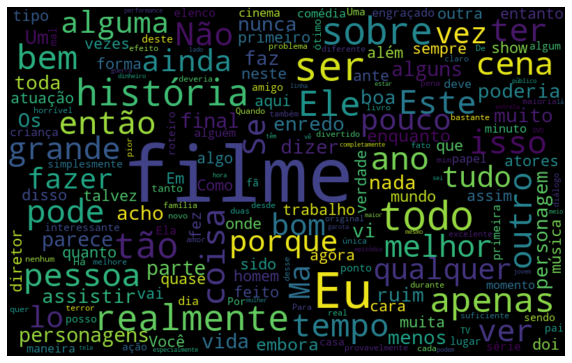

In [ ]:
pross_ling.img_nuvem_palavra("frase_processada", "pos", "sentiment")

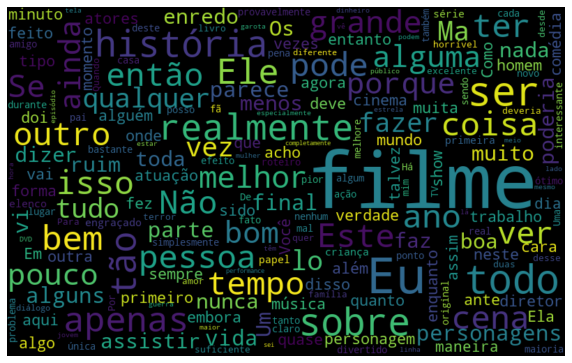

In [ ]:
pross_ling.img_nuvem_palavra("frase_processada", "neg", "sentiment")

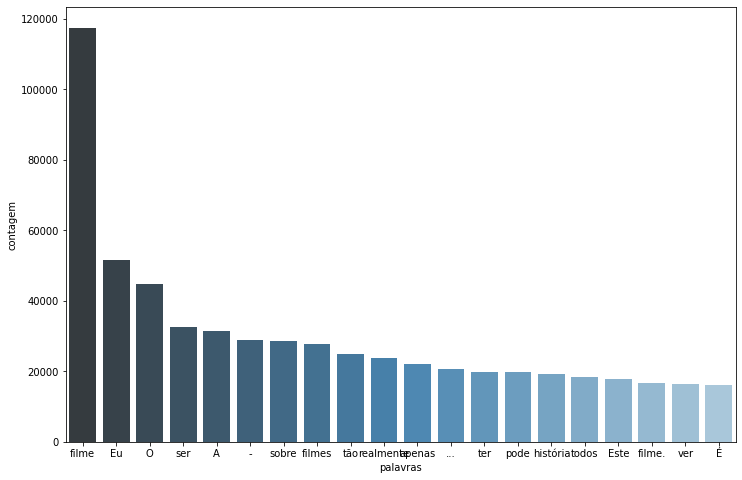

In [ ]:
pross_ling.f_pareto('frase_processada', 20)